# Лабораторная работа № 3
# ФИО студента: Пестов Александр Александрович
# Группа: 18-ИВТ-3
# Вариант: 9

   # Задание:
    1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
    2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
    3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
    4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
    5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
    6) Заполните пропущенные значения в данных;
    7) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

   ### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
    Date - Дата (ДД/ММ/ГГГГ)
    Time - Время (ЧЧ.ММ.СС)
    CO(GT) - Истинная часовая усредненная концентрация CO в мг / м^3 (эталонный анализатор)
    PT08.S1(CO) - PT08.S1 (оксид олова) часовой усредненный отклик датчика (номинально CO целевой)
    NMHC(GT) - Истинная почасовая усредненная общая концентрация неметаллических углеводородов в мкг / м^3 (эталонный анализатор)
    C6H6(GT) - Истинная почасовая усредненная концентрация бензола в мкг / м^3 (эталонный анализатор)
    PT08.S2(NMHC) - PT08.S2 (диоксид титана) часовой усредненный отклик датчика (номинально для nmhc)
    NOx(GT) - Истинная почасовая усредненная концентрация NOx в ppb (эталонный анализатор)
    PT08.S3(NOx) - PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)
    NO2(GT) - Истинная среднечасовая концентрация NO2 в мкг/м^3 (эталонный анализатор)
    PT08.S4(NO2) - PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NО2)
    PT08.S5(O3) - PT08.S5 (оксид индия) среднечасовой отклик датчика (номинально на O3)
    T - Температура в °C
    RH - Относительная влажность (%)
    AH - Абсолютная влажность

In [7]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from scipy import stats
warnings.simplefilter('ignore')
df_air_quality = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
data_air_quality = pd.DataFrame(df_air_quality)
data_air_quality.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10.03.2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10.03.2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10.03.2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10.03.2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10.03.2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [95]:
print("Количество строк до удаления:", len(data_air_quality))
before_value = len(data_air_quality)
data_air_quality = data_air_quality.drop_duplicates()
print("Количество строк после удаления:", len(data_air_quality))
print("Удалено: ", before_value - len(data_air_quality) , "строк")

Количество строк до удаления: 9357
Количество строк после удаления: 9357
Удалено:  0 строк


### 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

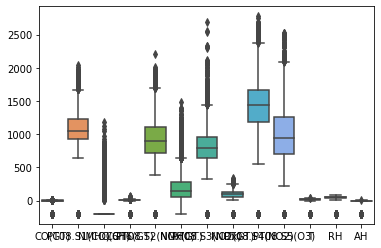

In [96]:
sns.boxplot(data = data_air_quality[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']])


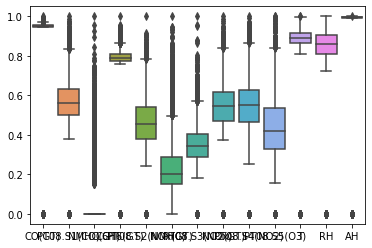

In [97]:
scaler = preprocessing.MinMaxScaler()
data_air_quality[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']] = scaler.fit_transform(data_air_quality[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].values.astype(float))
sns.boxplot(data=data_air_quality[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']])

### 4) Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

##### Категориальные признаки Date и Time являются уникальными, поэтопу замена не требуется. 

### 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

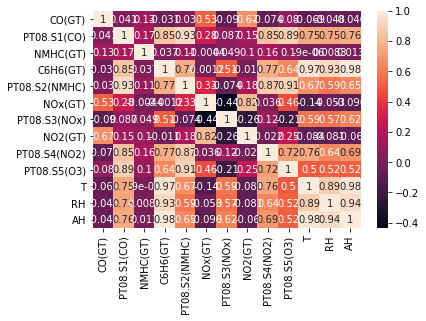

In [98]:
aCorr = data_air_quality.corr()
sns.heatmap(aCorr, annot = True)

### 6) Заполните пропущенные значения в данных;

In [99]:
data_air_quality = data_air_quality.isnull()
data_air_quality.sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Пропусков нет


### 7) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [3]:
data_air_quality.drop(['Date'], axis=1, inplace = True)
data_air_quality.drop(['Time'], axis=1, inplace = True)
data_x, data_y = data_air_quality.drop(['C6H6(GT)'], axis=1), data_air_quality['C6H6(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 222)

#### линейная регрессия, LASSO регуляризатор;

In [10]:
lasso = Lasso(alpha=0.2)
lasso.fit(train_x,train_y)
lasso_reg = lasso.predict(X = test_x)

pearson, p_pearson = stats.pearsonr(lasso_reg , test_y)
spearman, p_spearman = stats.spearmanr(lasso_reg , test_y)

print('Коэффициент Пирсона:', pearson)
print('Коэффициент Спирмена', spearman)
if p_pearson < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')
if p_spearman < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')    
    
print((lasso_reg[:15] - test_y[:15]).describe())

Коэффициент Пирсона: 0.9996006507407785
Коэффициент Спирмена 0.994997603144016
p-value is good
p-value is good
count    15.000000
mean     -0.258585
std       0.815875
min      -1.663102
25%      -0.899824
50%      -0.029371
75%       0.282512
max       1.155898
Name: C6H6(GT), dtype: float64


#### линейная регрессия, RIDGE регуляризатор;

In [11]:
reg = Ridge(alpha=0.2)
reg.fit(train_x,train_y)
ridge_reg = reg.predict(test_x)

pearson, p_pearson = stats.pearsonr(ridge_reg,test_y)
spearman, p_spearman = stats.spearmanr(ridge_reg, test_y)

print('Коэффициент Пирсона:', pearson)
print('Коэффициент Спирмена', spearman)

if p_pearson < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')
if p_spearman < 0.05:
    print('p-value is good')
else:
    print('p-value is not good') 
print((ridge_reg[:15] - test_y[:15]).describe())

Коэффициент Пирсона: 0.9996209164171024
Коэффициент Спирмена 0.9953203888784308
p-value is good
p-value is good
count    15.000000
mean     -0.207995
std       0.761269
min      -1.624923
25%      -0.759400
50%      -0.070221
75%       0.320973
max       0.929226
Name: C6H6(GT), dtype: float64
